In [7]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "/home/thuanc177/Documents/Git/Data-Analytic/Self"

# Load the latest version - using TMDB 5000 movie dataset which is available
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "tmdb/tmdb-movie-metadata",
    "tmdb_5000_movies.csv"  # This dataset has this specific CSV file
)

print("First 5 records:", df.head())

First 5 records:       budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  

In [ ]:
# basic info and fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Dataset shape: (4803, 20)
Missing values per column:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Duplicate movie IDs: 0

Top 10 movie genres:
Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Name: count, dtype: int64

Financial statistics (in millions USD):
 

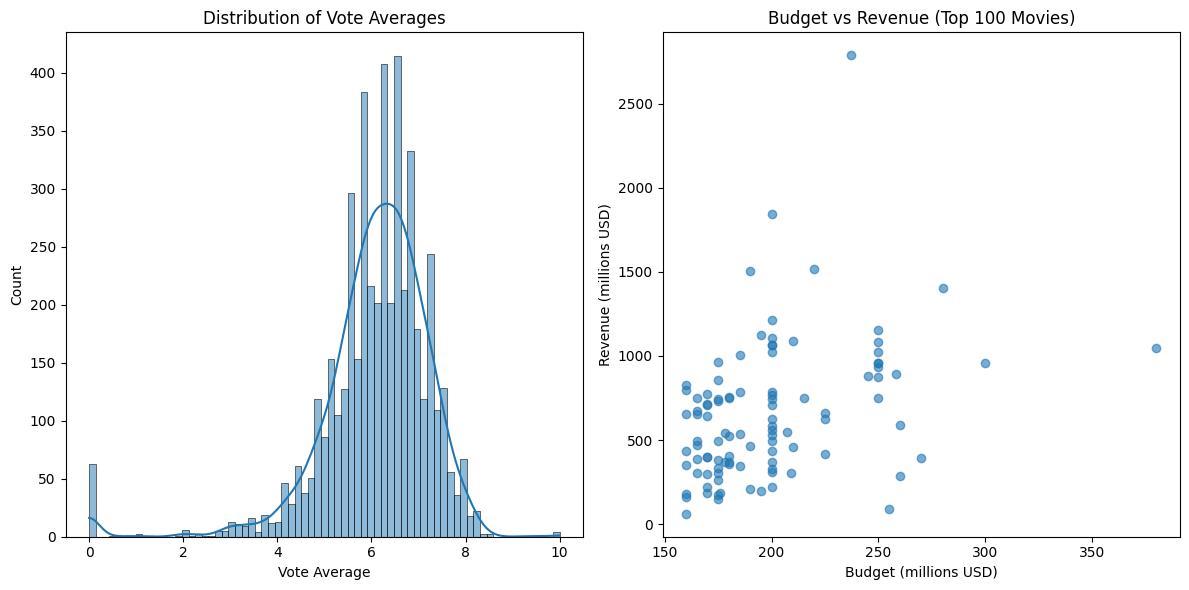

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import json

import matplotlib.pyplot as plt

# Basic data inspection
print(f"Dataset shape: {df.shape}")
print(f"Missing values per column:\n{df.isnull().sum()}")

# Check for duplicate movie IDs
print(f"\nDuplicate movie IDs: {df['id'].duplicated().sum()}")

# Parse and explore the JSON fields
# Example with genres field
def extract_json_field(row, field):
    try:
        data = json.loads(row.replace("'", "\""))
        return [item['name'] for item in data]
    except:
        return []

# Extract genres as a list
df['genres_list'] = df['genres'].apply(lambda x: extract_json_field(x, 'name') if isinstance(x, str) and x != '[]' else [])

# Get top genres
all_genres = [genre for sublist in df['genres_list'] for genre in sublist]
top_genres = pd.Series(all_genres).value_counts().head(10)
print("\nTop 10 movie genres:")
print(top_genres)

# Financial metrics
df['profit'] = df['revenue'] - df['budget']
df['roi'] = np.where(df['budget'] > 0, (df['revenue'] - df['budget']) / df['budget'], 0)

# Basic statistics for numerical columns
print("\nFinancial statistics (in millions USD):")
financial_stats = df[['budget', 'revenue', 'profit']].describe() / 1000000
print(financial_stats)

# Visualize data
plt.figure(figsize=(12, 6))

# Plot 1: Distribution of vote averages
plt.subplot(1, 2, 1)
sns.histplot(df['vote_average'], kde=True)
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Count')

# Plot 2: Budget vs Revenue (top 100 movies by budget)
plt.subplot(1, 2, 2)
top_budget = df.nlargest(100, 'budget')
plt.scatter(top_budget['budget']/1000000, top_budget['revenue']/1000000, alpha=0.6)
plt.title('Budget vs Revenue (Top 100 Movies)')
plt.xlabel('Budget (millions USD)')
plt.ylabel('Revenue (millions USD)')

plt.tight_layout()
plt.show()